In [0]:
import os

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage

from keras.models import  Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D,Dense,MaxPooling2D,Dropout,Flatten

import cv2 as cv

from sklearn.utils import shuffle
from sklearn.model_selection import  train_test_split
from imgaug import augmenters as iaa

import pandas as pd

import random
import ntpath



In [32]:
!git clone https://bitbucket.org/njnitesh/self_driving_car_data.git

fatal: destination path 'self_driving_car_data' already exists and is not an empty directory.


In [33]:
!ls self_driving_car_data/

driving_log1.csv  driving_log.csv  IMG	IMG1


In [0]:
datadir = 'self_driving_car_data'
column = ['center','left','right','steering','throttle','reverse','speed']
data = pd.read_csv(os.path.join(datadir,'driving_log.csv'),names=column)


In [0]:

data1 = pd.read_csv(os.path.join(datadir,'driving_log1.csv'),names=column)

In [0]:
data.center = data.center.apply(lambda x: x.split("\\")[-1])

In [0]:
data1.center = data1.center.apply(lambda x: x.split("\\")[-1])

In [38]:
data.head(2)

center  ...     speed
0  center_2019_06_12_17_54_36_075.jpg  ...  0.000078
1  center_2019_06_12_17_54_36_249.jpg  ...  0.000078

[2 rows x 7 columns]

In [39]:
dt = data.loc[:,['center','steering']]
dt.head()

center  steering
0  center_2019_06_12_17_54_36_075.jpg       0.0
1  center_2019_06_12_17_54_36_249.jpg       0.0
2  center_2019_06_12_17_54_36_351.jpg       0.0
3  center_2019_06_12_17_54_36_468.jpg       0.0
4  center_2019_06_12_17_54_36_572.jpg       0.0

In [40]:
dt1 = data1.loc[:,['center','steering']]
dt1.head()

center  steering
0  center_2019_06_12_18_08_47_758.jpg       0.0
1  center_2019_06_12_18_08_47_858.jpg       0.0
2  center_2019_06_12_18_08_47_964.jpg       0.0
3  center_2019_06_12_18_08_48_067.jpg       0.0
4  center_2019_06_12_18_08_48_174.jpg       0.0

In [0]:
num_bins = 25
hist,bins = np.histogram(dt['steering'],num_bins)
#type(hist)

In [42]:
print(hist)
print(bins)
center = (bins[:-1]+bins[:-1])*0.5
print(center)

[  18    5   13   28   66   34   79  174  253   69  109  189 4999   39
   25    9   70   56   20    8   27   17    4    1   12]
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92]


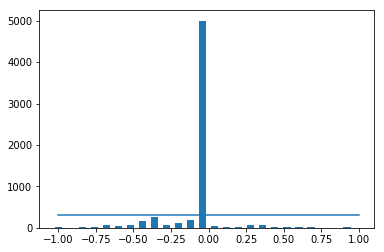

In [43]:
sample_per_bin = 300
plt.bar(center,hist,width=0.05)
plt.plot((np.min(dt['steering']),np.max(dt['steering'])),(sample_per_bin,sample_per_bin))

In [0]:
# p = dt[(dt.steering >=-0.04) & (dt.steering <=0.04)]
# p.index[300:]
# dt.drop(p.index[300:],inplace=True)


In [0]:
# dt.count()

In [0]:
# hist,_ = np.histogram(dt['steering'],(num_bins))
# plt.bar(center,hist,width=0.05)
# print(hist)
# plt.plot((np.min(dt['steering']),np.max(dt['steering'])),(sample_per_bin,sample_per_bin))

total data: 6324
removed: 4699
remaining 1625
[ 18   5  13  28  66  34  79 174 253  69 109 189 300  39  25   9  70  56
  20   8  27  17   4   1  12]


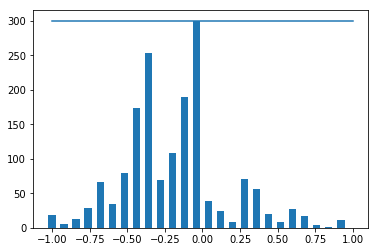

In [46]:
print('total data:',len(dt))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(dt['steering'])):
#     print('hii')
    if dt['steering'][i] >= bins[j]  and dt['steering'][i] <=bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[sample_per_bin:]
  remove_list.extend(list_)

print('removed:',len(remove_list))
dt.drop(dt.index[remove_list],inplace=True)
print('remaining',len(dt))

#Calculating the histogram for new plot
hist,_ = np.histogram(dt['steering'],(num_bins))
plt.bar(center,hist,width=0.05)
print(hist)
plt.plot((np.min(dt['steering']),np.max(dt['steering'])),(sample_per_bin,sample_per_bin))
      

In [0]:
#For data 2
num_bins1 = 25
hist1,bins1 = np.histogram(dt1['steering'],num_bins1)
#type(hist)

In [48]:
print(hist1)
print(bins1)
center1 = (bins1[:-1]+bins1[:-1])*0.5
print(center1)

[ 41   8   8  15  25  25  29  43  62  28  42  48 846  26  11  18  49  17
  10  12  21   7   2   8   5]
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92]


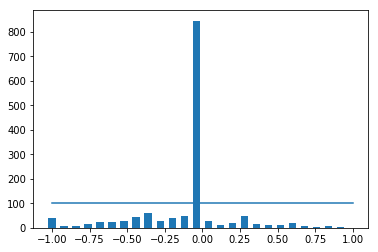

In [49]:
sample_per_bin1 = 100
plt.bar(center1,hist1,width=0.05)
plt.plot((np.min(dt1['steering']),np.max(dt1['steering'])),(sample_per_bin1,sample_per_bin1))

total data: 1406
removed: 746
remaining 660
[ 41   8   8  15  25  25  29  43  62  28  42  48 100  26  11  18  49  17
  10  12  21   7   2   8   5]


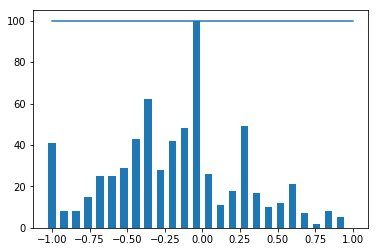

In [50]:
print('total data:',len(dt1))
remove_list1 = []
for j in range(num_bins1):
  list1_ = []
  for i in range(len(dt1['steering'])):
#     print('hii')
    if dt1['steering'][i] >= bins1[j]  and dt1['steering'][i] <=bins1[j+1]:
      list1_.append(i)
  list1_ = shuffle(list1_)
  list1_ = list1_[sample_per_bin1:]
  remove_list1.extend(list1_)

print('removed:',len(remove_list1))
dt1.drop(dt1.index[remove_list1],inplace=True)
print('remaining',len(dt1))

#Calculating the histogram for new plot
hist1,_ = np.histogram(dt1['steering'],(num_bins1))
plt.bar(center1,hist1,width=0.05)
print(hist1)
plt.plot((np.min(dt1['steering']),np.max(dt1['steering'])),(sample_per_bin1,sample_per_bin1))
      

In [0]:
def load_img_steering(base_dir,dataframe):
  image_paths=[]
  steering_angle=[]
  #Taking dataframe values as numpy array
  center=dataframe.iloc[:,0].values
  angle=dataframe.iloc[:,1].values
  #Itretting the loop over the whole numpy array
  for i in range(len(dataframe)):
    image_paths.append(os.path.join(base_dir,center[i]))
    steering_angle.append(angle[i])
  
  #Returning the list as numpy array
  image_p=np.array(image_paths)
  angle_p=np.array(steering_angle)
  return image_p,angle_p    

In [0]:
image_path,steering = load_img_steering("self_driving_car_data/IMG",dt)
image_path1,steering1 = load_img_steering("self_driving_car_data/IMG1",dt1)

In [53]:
type(steering)

numpy.ndarray

In [54]:
x_train,x_valid,y_train,y_valid = train_test_split(image_path,steering,test_size=0.2,random_state=21)
print('Training Samples:{}\nvalid Samples: {}'.format(len(x_train),len(x_valid)))

Training Samples:1300
valid Samples: 325


In [55]:
x_train1,x_valid1,y_train1,y_valid1 = train_test_split(image_path1,steering1,test_size=0.2,random_state=21)
print('Training Samples:{}\nvalid Samples: {}'.format(len(x_train1),len(x_valid1)))

Training Samples:528
valid Samples: 132


Text(0.5, 1.0, 'Zoomed Image')

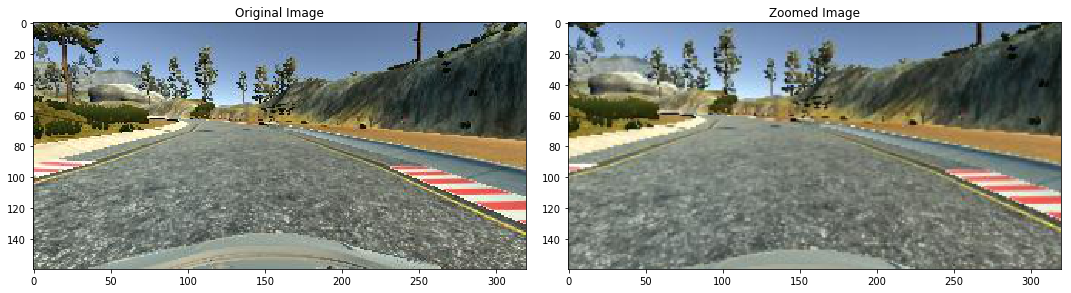

In [56]:
#defination
def zoom(image):
  zoom = iaa.Affine(scale=(1,1.3))
  image = zoom.augment_image(image)
  return image

#image selection
image = image_path[random.randint(0,1000)]
original_image = mpimage.imread(image)

#function aplied
zoomed_image = zoom(original_image)

#plotting both image in one canvas
fig,axis = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axis[0].imshow(original_image)
axis[0].set_title('Original Image')

axis[1].imshow(zoomed_image)
axis[1].set_title('Zoomed Image')

Text(0.5, 1.0, 'Panned Image')

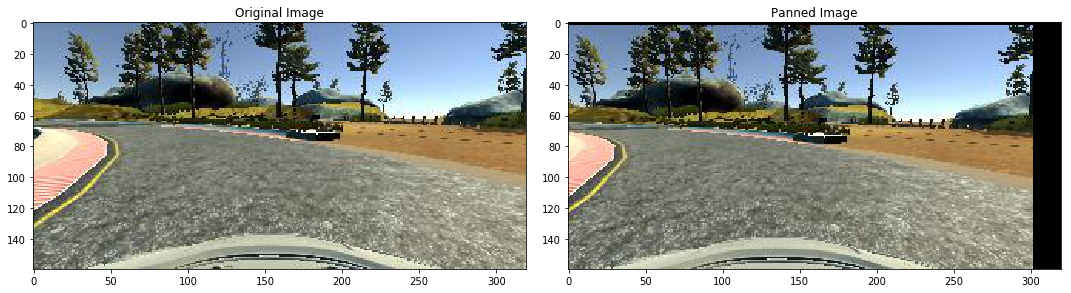

In [57]:
#defination
def pan(image):
  pan = iaa.Affine(translate_percent={"x":(-0.1,0.1),"y":(-0.1,0.1)})
  image = pan.augment_image(image)
  return image

image = image_path[random.randint(0,1000)]
original_image = mpimage.imread(image)
panned_image=pan(original_image)

fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image")

axs[1].imshow(panned_image)
axs[1].set_title("Panned Image")

Text(0.5, 1.0, 'Brightness Altered image')

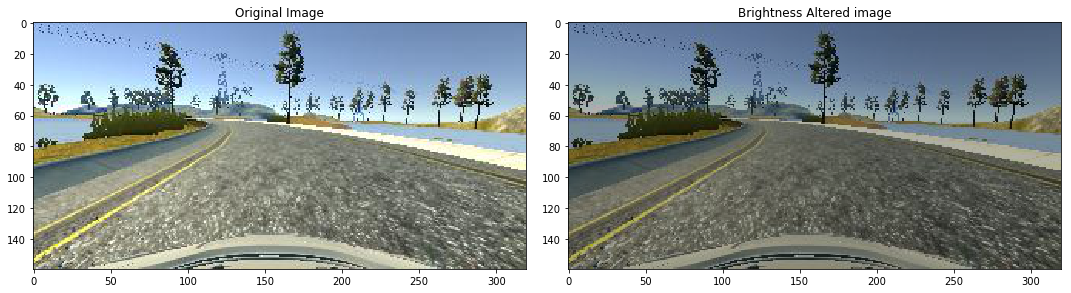

In [58]:
def img_random_brightness(image):
  brightness = iaa.Multiply((0.2,1.2))
  image = brightness.augment_image(image)
  return image

image = image_path[random.randint(0,1000)]
original_image = mpimage.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image")

axs[1].imshow(brightness_altered_image)
axs[1].set_title("Brightness Altered image")

Text(0.5, 1.0, 'Flipped Image - Steering Angle : 0.1493585')

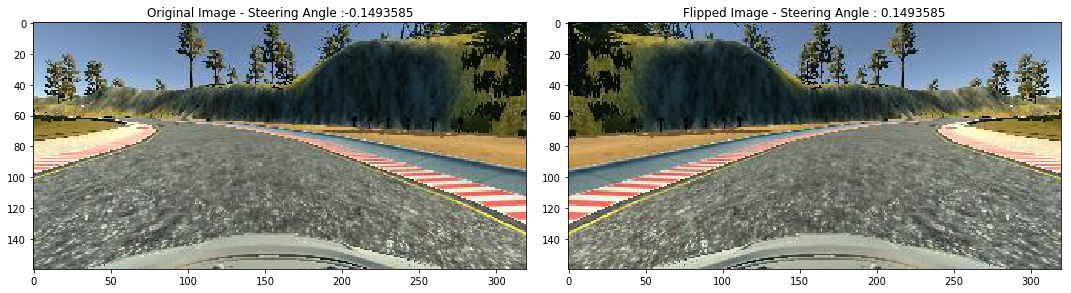

In [59]:
def img_random_flip(image,steering_angle):
  image = cv.flip(image,1)
  steering_angle = -steering_angle
  return image,steering_angle

random_index = random.randint(0,1000)
image = image_path[random_index]
steering_angle = steering[random_index]

original_image = mpimage.imread(image)
flipped_image,flipped_steering_angle = img_random_flip(original_image,steering_angle)

fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image - "+"Steering Angle :"+str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title("Flipped Image - "+"Steering Angle : "+str(flipped_steering_angle))

In [60]:
type(steering)

numpy.ndarray

In [0]:
def random_augment(image,steering_angle):
  image = mpimage.imread(image)
  if np.random.rand() < 0.5:
    image = pan(image)
  if np.random.rand() < 0.5:
    image = zoom(image)
  if np.random.rand() <0.5:
    image = img_random_brightness(image)
  if np.random.rand() < 0.5:
    image , steering_angle = img_random_flip(image,steering_angle)
  
  return image,steering_angle

In [62]:
type(steering)

numpy.ndarray

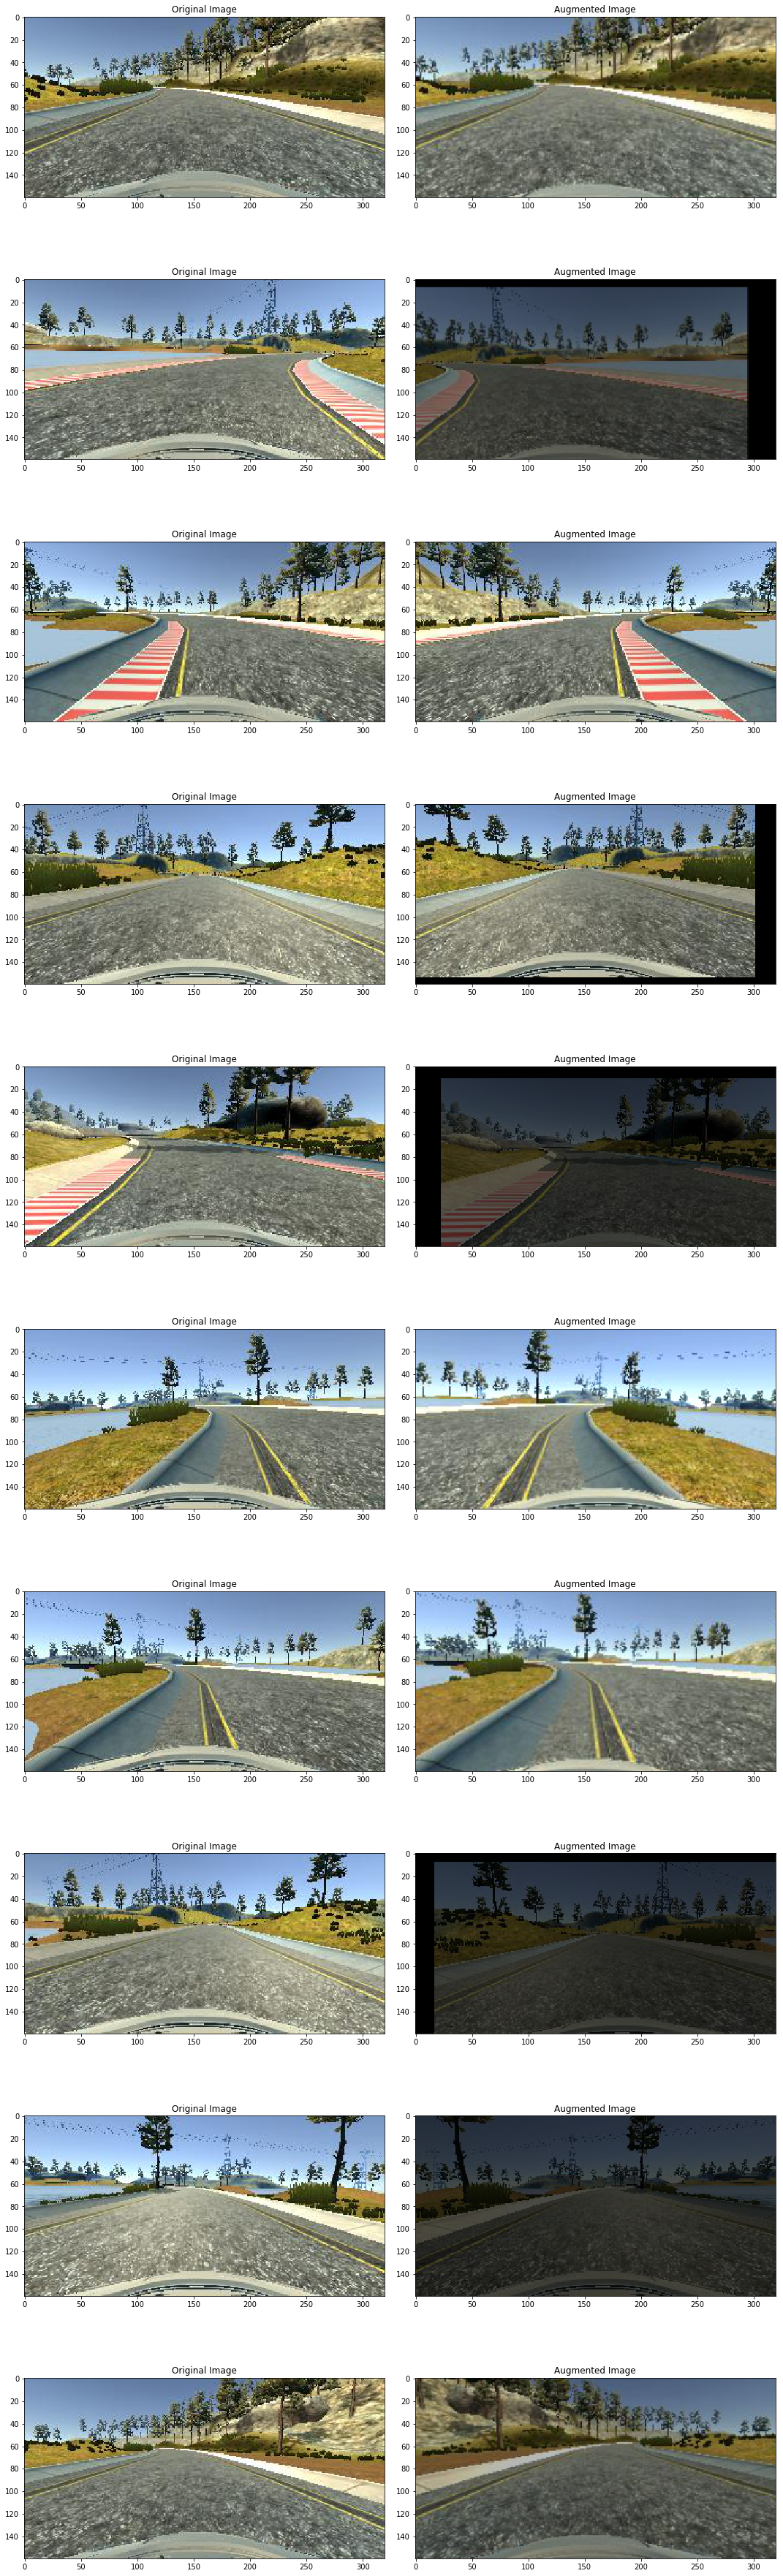

In [63]:
ncol = 2
nrow = 10

fig,axs = plt.subplots(nrow,ncol,figsize=(15,50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0,len(image_path)-1)
  random_image = image_path[randnum]
  random_steering = steering[randnum]
  
  original_image = mpimage.imread(random_image)
  augmented_image , steerings_ = random_augment(random_image,random_steering)
  
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

Text(0.5, 1.0, 'Preprocessed Image')

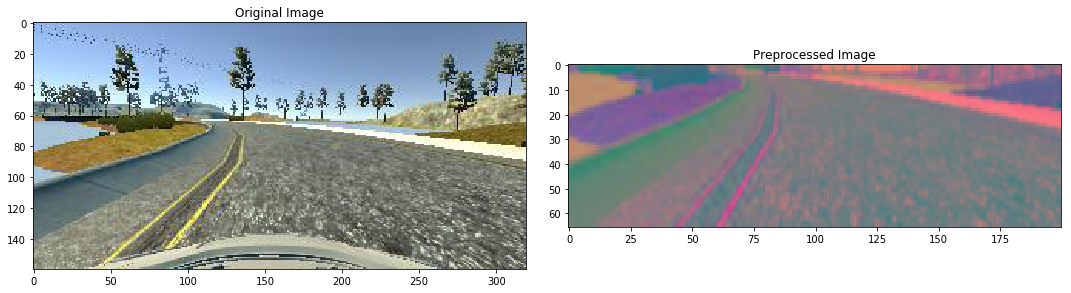

In [64]:
def img_preprocess(img):
  img = img[60:135,:,:]
  img = cv.cvtColor(img,cv.COLOR_RGB2YUV)
  img = cv.GaussianBlur(img,(3,3),0)
  img = cv.resize(img,(200,66))
  img = img/255
  return img

image = image_path[100]
original_image = mpimage.imread(image)
preprocessed_image = img_preprocess(original_image)

fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image")

axs[1].imshow(preprocessed_image)
axs[1].set_title("Preprocessed Image")

In [0]:
def batch_generator(image_path,steering_ang,batch_size,istraining):
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0,len(image_path)-1)
      
      if istraining:
        im,steering = random_augment(image_path[random_index],steering_ang[random_index])
        
      else:
        im = mpimage.imread(image_path[random_index])
        steering = steering_ang[random_index]
        
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
      
    yield (np.asarray(batch_img),np.asarray(batch_steering))

In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Convolution2D(64, 3, 3, activation='elu'))
  
  model.add(Convolution2D(64, 3, 3, activation='elu'))
  #model.add(Dropout(0.5))
  
  
  model.add(Flatten())
  
  model.add(Dense(100, activation = 'elu'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(50, activation = 'elu'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(10, activation = 'elu'))
  #model.add(Dropout(0.5))

  model.add(Dense(1))
  
  optimizer = Adam(lr=1e-4)
  model.compile(loss='mse', optimizer=optimizer,metrics=["accuracy"])
  return model

In [67]:
x_train[0]

'self_driving_car_data/IMG/center_2019_06_12_17_57_38_131.jpg'

In [68]:
model = nvidia_model()
print(model.summary())

W0618 08:42:13.362045 140628331444096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
W0618 08:42:13.390552 140628331444096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 08:42:13.396732 140628331444096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               115300    
__________

In [69]:
history = model.fit_generator(batch_generator(x_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=5,
                                  validation_data=batch_generator(x_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

W0618 08:42:13.767336 140628331444096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0618 08:42:14.027034 140628331444096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/5
300/300 [==============================] - 155s 517ms/step - loss: 0.1093 - acc: 0.1861 - val_loss: 0.0814 - val_acc: 0.1657
Epoch 2/5
300/300 [==============================] - 152s 507ms/step - loss: 0.0885 - acc: 0.1818 - val_loss: 0.0738 - val_acc: 0.1725
Epoch 3/5
300/300 [==============================] - 154s 512ms/step - loss: 0.0770 - acc: 0.1769 - val_loss: 0.0659 - val_acc: 0.1681
Epoch 4/5
300/300 [==============================] - 153s 511ms/step - loss: 0.0712 - acc: 0.1802 - val_loss: 0.0651 - val_acc: 0.1746
Epoch 5/5
300/300 [==============================] - 149s 496ms/step - loss: 0.0664 - acc: 0.1829 - val_loss: 0.0626 - val_acc: 0.1659


In [0]:
model.save('model.h5')

In [0]:
from google.colab import files
files.download('model.h5')